<a href="https://colab.research.google.com/github/ThakdanaiSaelee/Lab_CE888/blob/main/lab5%20-%20data_exploration/lab_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_wine

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Libraries for pre-processing
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

* We have loaded the necessary libraries above
* Now let's load the data

In [2]:
data = load_wine(as_frame=True)
df = data.data.copy()  # features
# Look at the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)
# and save the label in a column called 'y' in df.

df['y'] = data.target ## YOUR CODE HERE # label
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
df['alcohol'].corr(df['ash'])

0.21154459643174453

In [4]:
df['alcohol'].mean(axis=0)

13.000617977528083

In [5]:
#How many samples and features are there?
row = len(df)
column = len(df.columns) - 1                    # remove output column
# YOUR CODE HERE
print('number of samples:', row, 'number of features:', column)

number of samples: 178 number of features: 13


In [6]:
# Quiz Q1
# How many instances are there for each class? 

# YOUR CODE HERE
df['y'].value_counts()

1    71
0    59
2    48
Name: y, dtype: int64

In [7]:
# Calculate the means, medians, and standard deviations of each feature
# YOUR CODE HERE
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


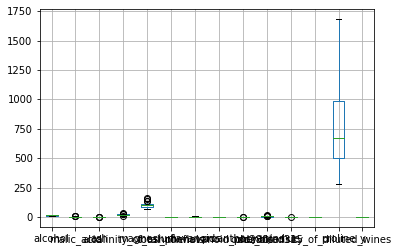

In [8]:
# Plot a boxplot of each feature (NOT THE LABEL!!) (all in one plot -- you can do this with a single line of code).
# Quiz Q2: Is there any feature that is in a clearly different scale than the others?

# YOUR CODE HERE
column = list(df.columns)
boxplot = df.boxplot(column= column)  

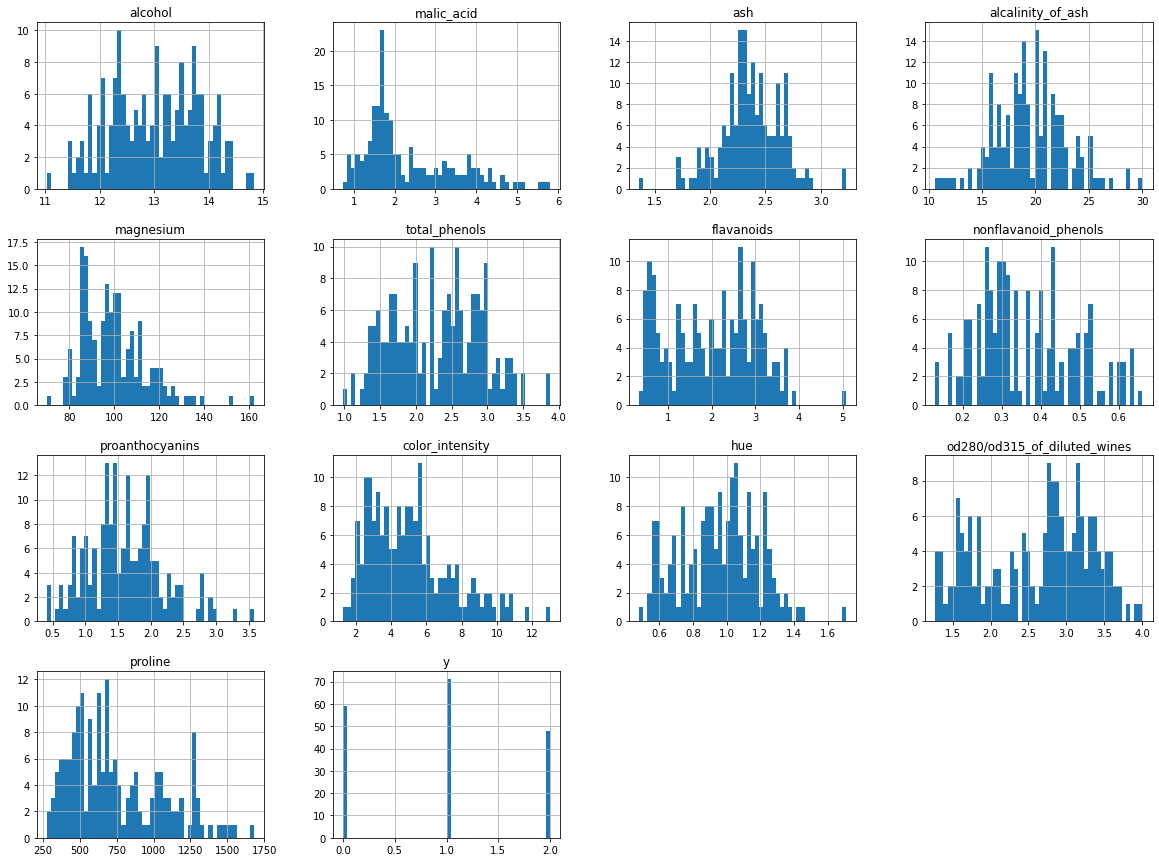

In [9]:
# Let's look at the distributions of values of our features. Draw a histogram for each of the features

# YOUR CODE HERE
_ = df.hist(bins=50, figsize=(20,15))

Let's do some multivariate analysis

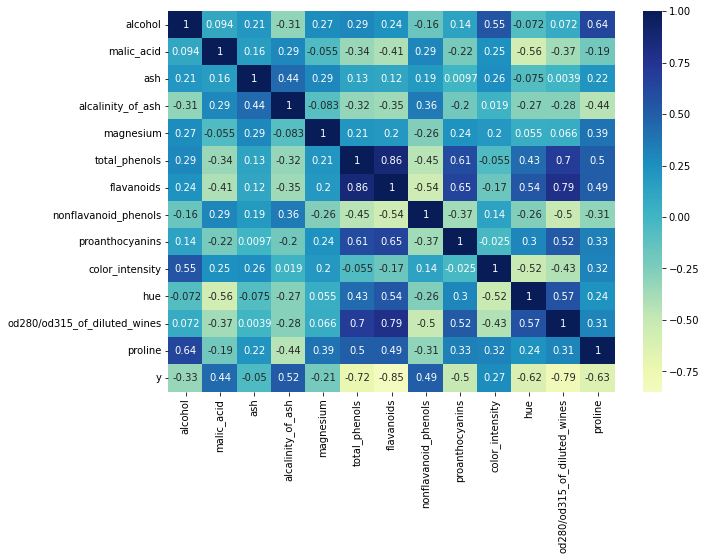

In [10]:
# Calculate the correlations between each pair of variables

# YOUR CODE HERE
correlations = df.corr()
#print(correlations['y'].sort_values(ascending=False))
# remove y from correlations
correlations_no_output = correlations.drop(labels = 'y', axis = 0)
correlations_no_output = correlations.drop(labels = 'y', axis = 1)

# Plot a heatmap of the correlations between pairs of FEATURES (i.e., don't include the target!)
# YOUR CODE HERE
f, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(correlations_no_output, annot=True, center=0,  cmap="YlGnBu")

In [11]:
# What is the highest correlation between features?
print('flavanoids and total_phenols are the highest correlation')


flavanoids and total_phenols are the highest correlation


You should have noticed that some of the features are highly correlated. 

For this reason, we can run into trouble when trying to train a classifier due to multicolinearity.

Let's do PCA on this dataset to remove these correlations

In [12]:
# Let's do PCA:
# HINT: I suggest you attempt Q5 of the quiz and then use the function you developed
#       in this and some of the following cells.

# 1. Standardise your data using a StandardScaler. Make sure you're not scaling the 'y'!

# YOUR CODE HERE
df_x = df.drop('y', axis=1)
num_features = list(df_x.columns)

colTransformer = ColumnTransformer([('num', StandardScaler(), num_features)
                                    ],
                                   remainder='passthrough'  # i.e., leave the rest of the columns untouched -- otherwise, they're dropped
                                  )

x_processed = colTransformer.fit_transform(df_x)
print(x_processed.shape)

# 2. Do PCA with 2 components. How much variance is retained from the original dataset?

# YOUR CODE HERE
pca_n = PCA(n_components=2)
x_pca_n = pca_n.fit_transform(x_processed)
np.cumsum(pca_n.explained_variance_ratio_)

(178, 13)


array([0.36198848, 0.55406338])

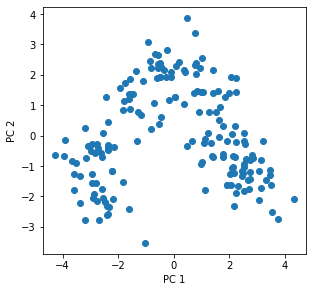

In [13]:
# Plot your two components, using the label from the data to colour the points

# YOUR CODE HERE
plt.figure(figsize=(16,10))
for i in range(1,2):
    plt.subplot(2, 3, i)
    plt.scatter(x_pca_n[:, i-1], x_pca_n[:, i])
    plt.xlabel('PC %d' % i)
    plt.ylabel('PC %d' % (i+1))
plt.savefig('students_pca_pcs.pdf', dpi=300)
plt.show()

In [14]:
# How many components do you need to keep at least 85% of the variance in the dataset? (Q6)

# YOUR CODE HERE
pca_n = PCA(n_components=0.85)
x_pca_n = pca_n.fit_transform(x_processed)
np.cumsum(pca_n.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116])

In [15]:
# How much variance is retained if we do PCA with 3 components? (Q7)

# YOUR CODE HERE
pca_n = PCA(n_components=3)
x_pca_n = pca_n.fit_transform(x_processed)
np.cumsum(pca_n.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969])

## Clustering

Let's see how many clusters does K-Means find.



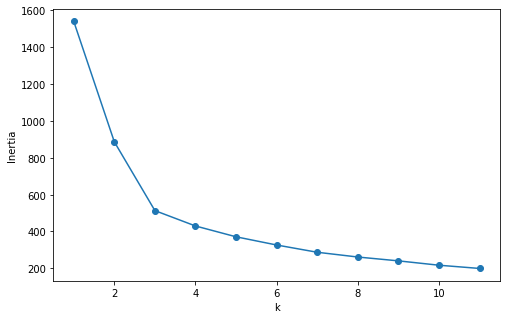

In [16]:
# Use the elbow method to select the number of clusters in your data using 3 PCs.

# YOUR CODE HERE
inertias, sil = [], []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    y_pred = kmeans.fit_predict(x_pca_n)
    inertias.append(kmeans.inertia_)
    if k > 1:
        sil.append(silhouette_score(x_pca_n, y_pred))

# Let's plot inertia vs number of clusters
plt.figure(figsize=(8,5))
plt.plot(range(1, 12), inertias, 'o-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.savefig('elbow_moons.pdf', dpi=300)
plt.show()

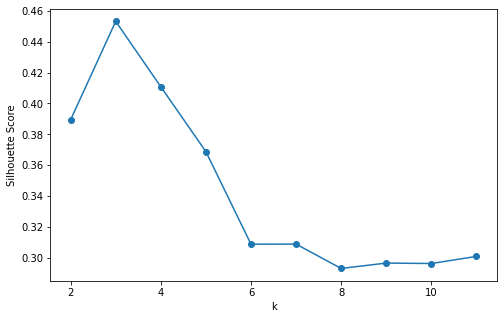

In [17]:
# Now use the silhouette score to choose between the two candidate k values from the previous cell

# YOUR CODE HERE
plt.figure(figsize=(8,5))
plt.plot(range(2, 12), sil, 'o-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.savefig('elbow_moons_sil.pdf', dpi=300)
plt.show()

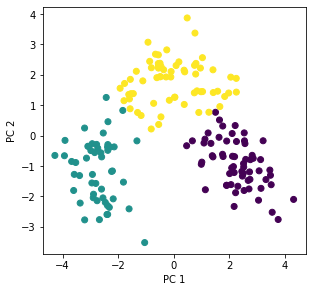

In [18]:
# Visualise the first two pcs (using a scatterplot) using the labels from KMeans with your chosen value of k

# YOUR CODE HERE
kmean = KMeans(n_clusters=3)
kmean.fit(x_pca_n)

plt.figure(figsize=(16,10))
for i in range(1, 2):
    plt.subplot(2, 3, i)
    plt.scatter(x_pca_n[:, i-1], x_pca_n[:, i], c=kmean.labels_)
    plt.xlabel('PC %d' % i)
    plt.ylabel('PC %d' % (i+1))
plt.savefig('students_pca_clusters_kmeans=2.pdf', dpi=300)
plt.show()

Now we can try to understand our clusters.

In [30]:
# In the original (before PCA and before standardisation) dataframe, add a column called 'cluster' that contains
# the cluster assignment from above

# YOUR CODE HERE
original = data.data.copy()
original['cluster'] = kmean.labels_
original

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,1
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,1
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,1
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,1


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

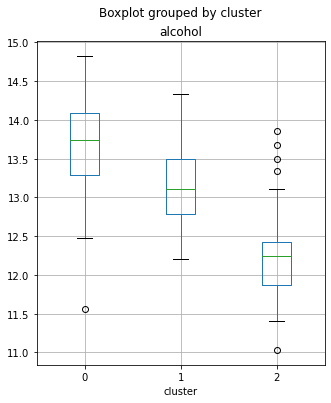

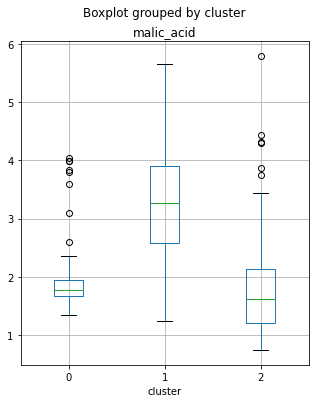

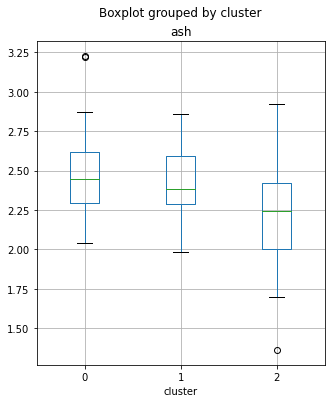

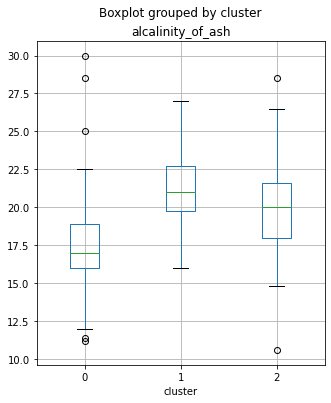

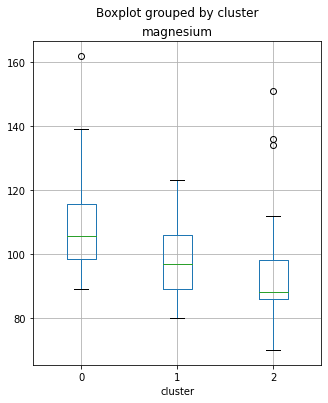

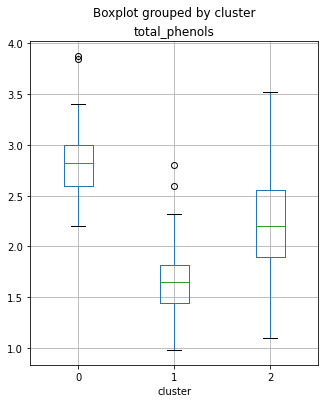

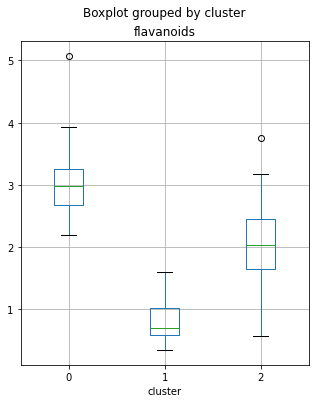

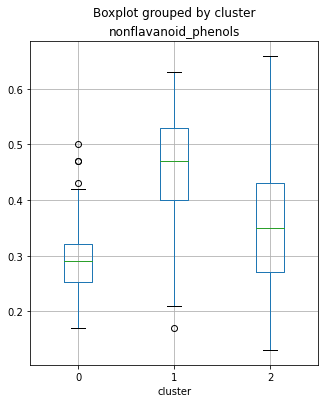

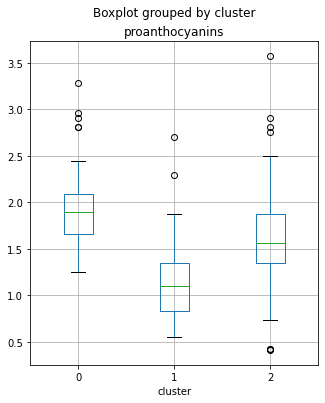

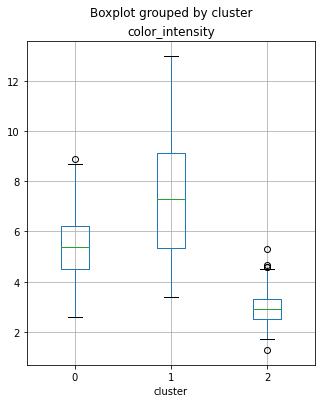

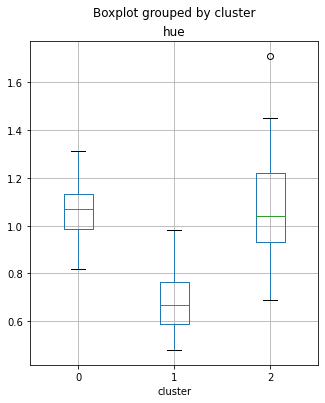

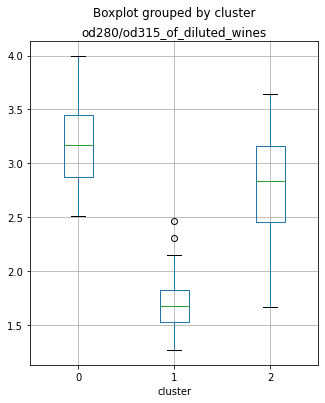

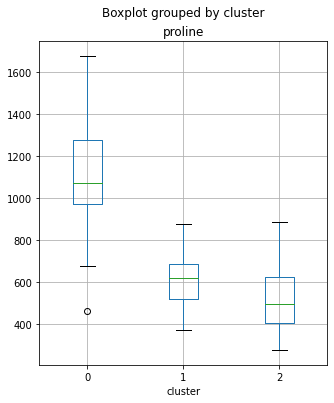

In [47]:
# Do a boxplot of each feature, separating between clusters

# YOUR CODE HERE
column = list(original.columns)
column.remove('cluster')
for i in column:
  boxplot = original.boxplot(column = i, by='cluster', figsize = (5,6))

Write your observations here.
For example: is there a clear difference between the clusters in terms of alcohol content? What about flavanoids?

In [ ]:
# Feel free to keep playing with the data here!